## 파이썬에서 t-test 하는 방법 알아보기
---
파이썬(Python)을 이용해서 통계 검정을 하는 경우가 많아지고 있습니다. 예전에는 통계에 특화된 R과 같은 프로그래밍 언어를 사용하거나, SPSS 등의 통계 프로그램을 사용하는 경우가 많았지만 파이썬에서 쓸만한 통계 패키지가 많아져서 사용자를 흡수한 덕분일겁니다. 그래서, 이번에는 파이썬을 이용한 t-검정(t-test)을 하는 방법을 알아보도록 하겠습니다.  
</p></br></br>


### t-test
---
t-test는 사람에 따라 Student's t-test 등으로 말하기도  같은 말이니 적절한 표현을 사용해 주시면 되겠습니다. 그보다 중요한건 t-test의 정의인데요, 간단히 말해서 **두 모집단의 평균 차이가 있는지를 알아보는 통계적 검정 방법**입니다. 이말인즉슨, 두 그룹을 대상으로 t-test를 해본 다음 유의하다는 결과가 나오면 두 그룹은 모평균 차이가 있다는 말입니다. 주의할 점은, 모평균 차이가 있다뿐이지 그 이상의 의미는 아무것도 없다는 말이지요.  
</p></br></br>


* A그룹과 B그룹의 지표를 t-test 해본 결과, p-value < 0.05이므로 두 그룹에는 차이가 있어! (참)
* 1군의 득점과 2군의 득점 정보를 이용해서 t-test 해 봤는데, p-value < 0.05이므로 1군이 더 잘하네! (거짓)
</p></br></br>


### t-test의 가설
---
많은 통계 검정이 그렇듯, t-test도 귀무가설(Null Hypothesis, H0)과 대립가설(Alternative Hypothesis, H1)을 가지고 있습니다. 이를 이용해 유의확률(Significance Probability, p-value)을 계산한 다음 가설을 채택 혹은 기각하는 방식으로 검정을 하는데요, 예를 들어 A 그룹과 B 그룹이 있다고 가정한다면 t-test의 가설 설정은 다음과 같이 진행합니다.  
</p></br></br>


* H0: A 그룹과 B 그룹의 모평균은 서로 차이나지 않을 것이다.
* H1: A 그룹과 B 그룹의 모평균은 서로 차이가 날 것이다.
</p></br></br>


여기서 p-value가 임계값 미만이라면(주로 0.05), 대립가설에 대한 증거가 충분한 것으로 가정해 귀무가설을 기각하고, 두 그룹의 모평균이 차이나는 것으로 확정합니다. 반대라면, 귀무가설을 채택해서 두 그룹의 모평균은 차이가 없는 것으로 확정하게 되지요.  
</p></br></br>


### t-test의 가정
---
t-test는 분석의 특성상 특정한 가정을 만족해야만 분석이 가능합니다. 예를 들어, Student's t-test의 경우에는 각 집단의 값이 정규분포와 등분산성을 따라야 하고, 입력되는 데이터가 양적 변수여야 한다는 조건또한 있습니다. 이를 제대로 만족하지 않는 경우, 입력 데이터를 변환하거나 다른 검정방법을 사용하는 것이 좋습니다. 정규성 검정과 등분산 검정은 아래 방법을 이용할 수 있으나, 이번 실습에서는 편의상 t-test 코드만 입력해 보도록 하겠습니다.  
</p></br></br>


* 정규성 검정: Shapiro-Wilk test, 정규분포와 비교하는 Kolmogorov–Smirnov test, QQ-plot을 확인하기
* 등분산 검정: Bartlett test, Levene test  
</p></br></br>


### 파이썬으로 t-test 해보기
---
파이썬에는 scipy라는 패키지에서 t-test를 지원하고 있습니다. 아래 코드를 살펴보면서 t-test 실습을 해 보시기 바랍니다. 이 코드에서는 iris setosa와 iris versicolor 두 종 사이의 sepal length(cm)를 대상으로 t-test를 수행하고, 박스플롯으로 시각화하는 과정까지 진행해 봤습니다.  
</p></br></br>



In [1]:
# 패키지 및 데이터 불러오기
from scipy import stats
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
iris = load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = [iris.target_names[x] for x in iris.target]
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# 그룹별 분류
iris_setosa = df_iris[df_iris['species'] == 'setosa']
iris_versicolor = df_iris[df_iris['species'] == 'versicolor']

In [3]:
# t-test. p < 0.05 이므로 모평균 차이가 유의함
stats.ttest_ind(iris_setosa['sepal length (cm)'], iris_versicolor['sepal length (cm)'])

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)

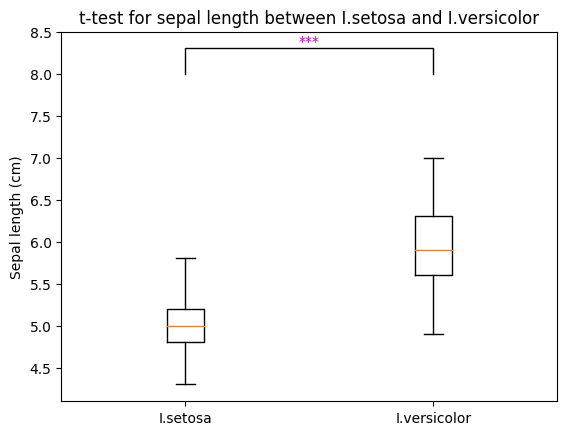

In [4]:
# 시각화
plt.boxplot([iris_setosa['sepal length (cm)'], iris_versicolor['sepal length (cm)']])
t, p = stats.ttest_ind(iris_setosa['sepal length (cm)'], iris_versicolor['sepal length (cm)'])

#star mark 표시하기
if(p<0.05 and p>=0.01):
    sig = '*'
elif(p<0.01 and p>=0.001):
    sig = '**'
elif(p<0.001):
    sig = '***'
else:
    sig = 'ns'
    
x1, x2 = 1,2   
y, h = np.max([iris_setosa['sepal length (cm)'], iris_versicolor['sepal length (cm)']]) + 1, 0.3

# 선 그리기. x,y 좌표에 따라 선을 그림. (x1,y) > (x1,y+h)... lw: 선 굵기, c: color
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')

# 글 적기. 좌표 지정 후 내용, 좌우정렬, 수직정렬, 색상 순
plt.text((x1+x2)*.5, y+h, sig, ha='center', va='bottom', color='m')

plt.xticks([1,2],['I.setosa','I.versicolor'])
plt.ylabel('Sepal length (cm)')
plt.title('t-test for sepal length between I.setosa and I.versicolor')
plt.show()